In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [20]:
df = pd.read_csv("football_data.csv")
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

In [21]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [22]:
df = df.drop(['Unnamed: 0', 'Contract Valid Until', 'Club', 'Nationality', 'Age', 'Value', 'Special', 'International Reputation', 'Preferred Foot', 'Weak Foot', 'Wage', 'Overall', 'Potential', 'Jersey Number', 'Joined', 'Real Face', 'Body Type', 'Loaned From', 'Height', 'Weight', 'Release Clause'], axis=1)
df = df.drop(['GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1)

In [23]:
df=df.dropna()

In [24]:
df[['Attacking','Defending']]=df['Work Rate'].str.split("/ ", expand=True)
df = df.drop(['Work Rate'], axis=1)

In [25]:
print(df['Position'].unique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'No' 'LWB']


In [26]:
df.loc[df["Position"] == "GK", "Position"] = 0
df.loc[df["Position"] == "CB", "Position"] = 1
df.loc[df["Position"] == "RCB", "Position"] = 2
df.loc[df["Position"] == "LCB", "Position"] = 3
df.loc[df["Position"] == "RB", "Position"] = 4
df.loc[df["Position"] == "LB", "Position"] = 5
df.loc[df["Position"] == "RWB", "Position"] = 6
df.loc[df["Position"] == "LWB", "Position"] = 7
df.loc[df["Position"] == "CDM", "Position"] = 8
df.loc[df["Position"] == "RDM", "Position"] = 9
df.loc[df["Position"] == "LDM", "Position"] = 10
df.loc[df["Position"] == "CM", "Position"] = 11
df.loc[df["Position"] == "RCM", "Position"] = 12
df.loc[df["Position"] == "LCM", "Position"] = 13
df.loc[df["Position"] == "RM", "Position"] = 14
df.loc[df["Position"] == "LM", "Position"] = 15
df.loc[df["Position"] == "CAM", "Position"] = 16
df.loc[df["Position"] == "RAM", "Position"] = 17
df.loc[df["Position"] == "LAM", "Position"] = 18
df.loc[df["Position"] == "CF", "Position"] = 19
df.loc[df["Position"] == "RF", "Position"] = 20
df.loc[df["Position"] == "LF", "Position"] = 21
df.loc[df["Position"] == "RW", "Position"] = 22
df.loc[df["Position"] == "LW", "Position"] = 23
df.loc[df["Position"] == "ST", "Position"] = 24
df.loc[df["Position"] == "RS", "Position"] = 25
df.loc[df["Position"] == "LS", "Position"] = 26

df=df[df['Position']!='No']


Positions_array=['GK','CB','RCB','LCB','RB','LB','RWB','LWB','CDM','RDM','LDM','CM','RCM','LCM','RM','LM','CAM','RAM','LAM','CF','RF','LF','RW','LW','ST','RS','LS']



In [27]:

df.loc[df["Defending"] == "High", "Defending"] = 3
df.loc[df["Defending"] == "Medium", "Defending"] = 2
df.loc[df["Defending"] == "Low", "Defending"] = 1


df.loc[df["Attacking"] == "High", "Attacking"] = 3
df.loc[df["Attacking"] == "Medium", "Attacking"] = 2
df.loc[df["Attacking"] == "Low", "Attacking"] = 1


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
df_5000=df.head(1000)
df=df.head(50)

In [30]:
df_id=df
df = df.drop(['ID','Name'], axis=1)
df_5000 = df_5000.drop(['ID','Name'], axis=1)

In [31]:
df.reset_index(inplace = True,drop = True)
df_id.reset_index(inplace = True,drop = True)
df_5000.reset_index(inplace = True,drop = True)

#####################################
Cluster number 1
De Gea GK
J. Oblak GK
M. ter Stegen GK
T. Courtois GK
M. Neuer GK
H. Lloris GK
S. Handanovič GK
G. Buffon GK
K. Navas GK
#####################################
Cluster number 2
Sergio Ramos RCB
D. Godín CB
Sergio Busquets CDM
G. Chiellini LCB
Casemiro CDM
M. Hummels LCB
Thiago Silva RCB
S. Umtiti CB
#####################################
Cluster number 3
Marcelo LB
Jordi Alba LB
#####################################
Cluster number 4
L. Messi RF
Cristiano Ronaldo ST
Neymar Jr LW
K. De Bruyne RCM
E. Hazard LF
L. Modrić RCM
L. Suárez RS
R. Lewandowski ST
David Silva LCM
P. Dybala LF
H. Kane ST
A. Griezmann CAM
E. Cavani LS
S. Agüero ST
K. Mbappé RM
M. Salah RM
J. Rodríguez LAM
L. Insigne LW
Isco LW
C. Eriksen CAM
Coutinho LW
P. Aubameyang LM
G. Bale ST
G. Higuaín LS
M. Icardi ST
P. Pogba RDM
R. Lukaku ST
C. Immobile ST
#####################################
Cluster number 5
T. Kroos LCM
#####################################
Cluster numbe

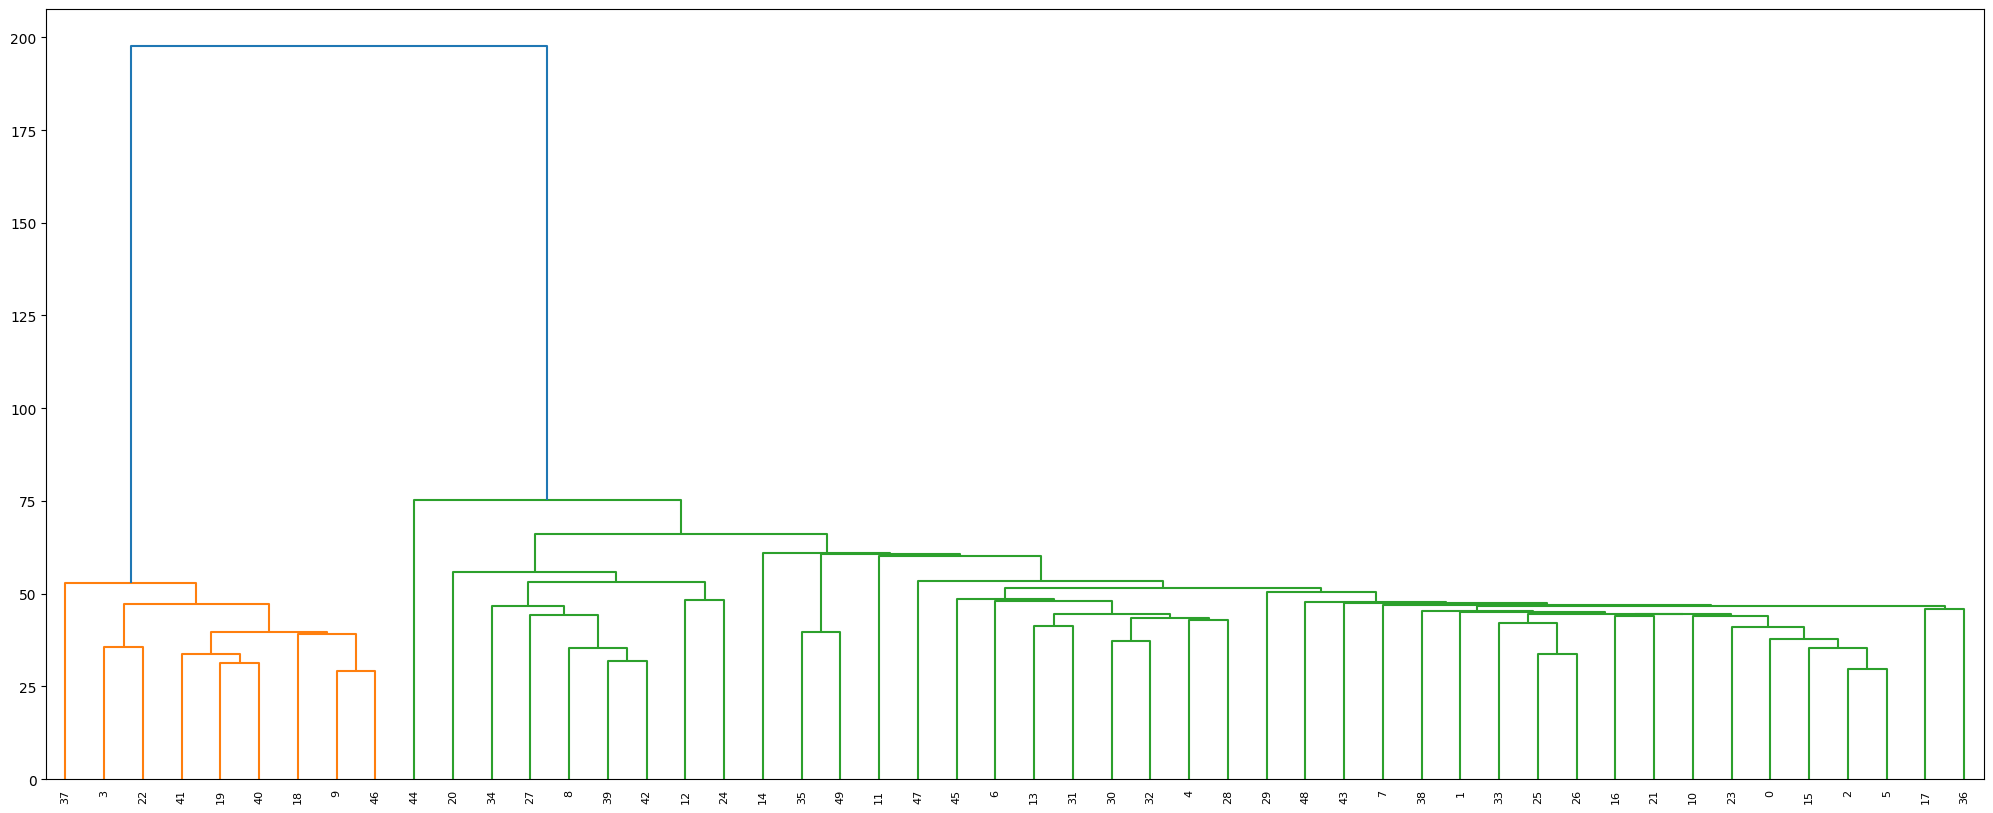

In [32]:
import scipy

Z = linkage(df, 'single')

labels = scipy.cluster.hierarchy.fcluster(Z, t=60, criterion='distance')

#print(labels)

maximum=max(labels)


for j in range(1,maximum+1):
    print("#####################################")
    print("Cluster number "+str(j))
    for i in range(df.shape[0]):
        if(labels[i]==j):
            print(df_id['Name'][i]+" ", end="")
            print(Positions_array[df['Position'][i]])

    
    
fig = plt.figure(figsize=(25, 10))

dn = dendrogram(Z)

plt.show()


#####################################
Cluster number 1
L. Messi RF
Cristiano Ronaldo ST
Neymar Jr LW
E. Hazard LF
L. Suárez RS
R. Lewandowski ST
P. Dybala LF
H. Kane ST
A. Griezmann CAM
E. Cavani LS
S. Agüero ST
K. Mbappé RM
M. Salah RM
L. Insigne LW
P. Aubameyang LM
G. Bale ST
G. Higuaín LS
M. Icardi ST
R. Lukaku ST
C. Immobile ST
#####################################
Cluster number 2
K. De Bruyne RCM
L. Modrić RCM
Sergio Ramos RCB
T. Kroos LCM
David Silva LCM
N. Kanté LDM
Sergio Busquets CDM
Casemiro CDM
J. Rodríguez LAM
Isco LW
C. Eriksen CAM
Coutinho LW
M. Hummels LCB
Marcelo LB
Thiago Silva RCB
S. Umtiti CB
P. Pogba RDM
Jordi Alba LB
#####################################
Cluster number 3
De Gea GK
J. Oblak GK
M. ter Stegen GK
T. Courtois GK
M. Neuer GK
H. Lloris GK
S. Handanovič GK
G. Buffon GK
K. Navas GK
#####################################
Cluster number 4
D. Godín CB
G. Chiellini LCB
K. Koulibaly LCB


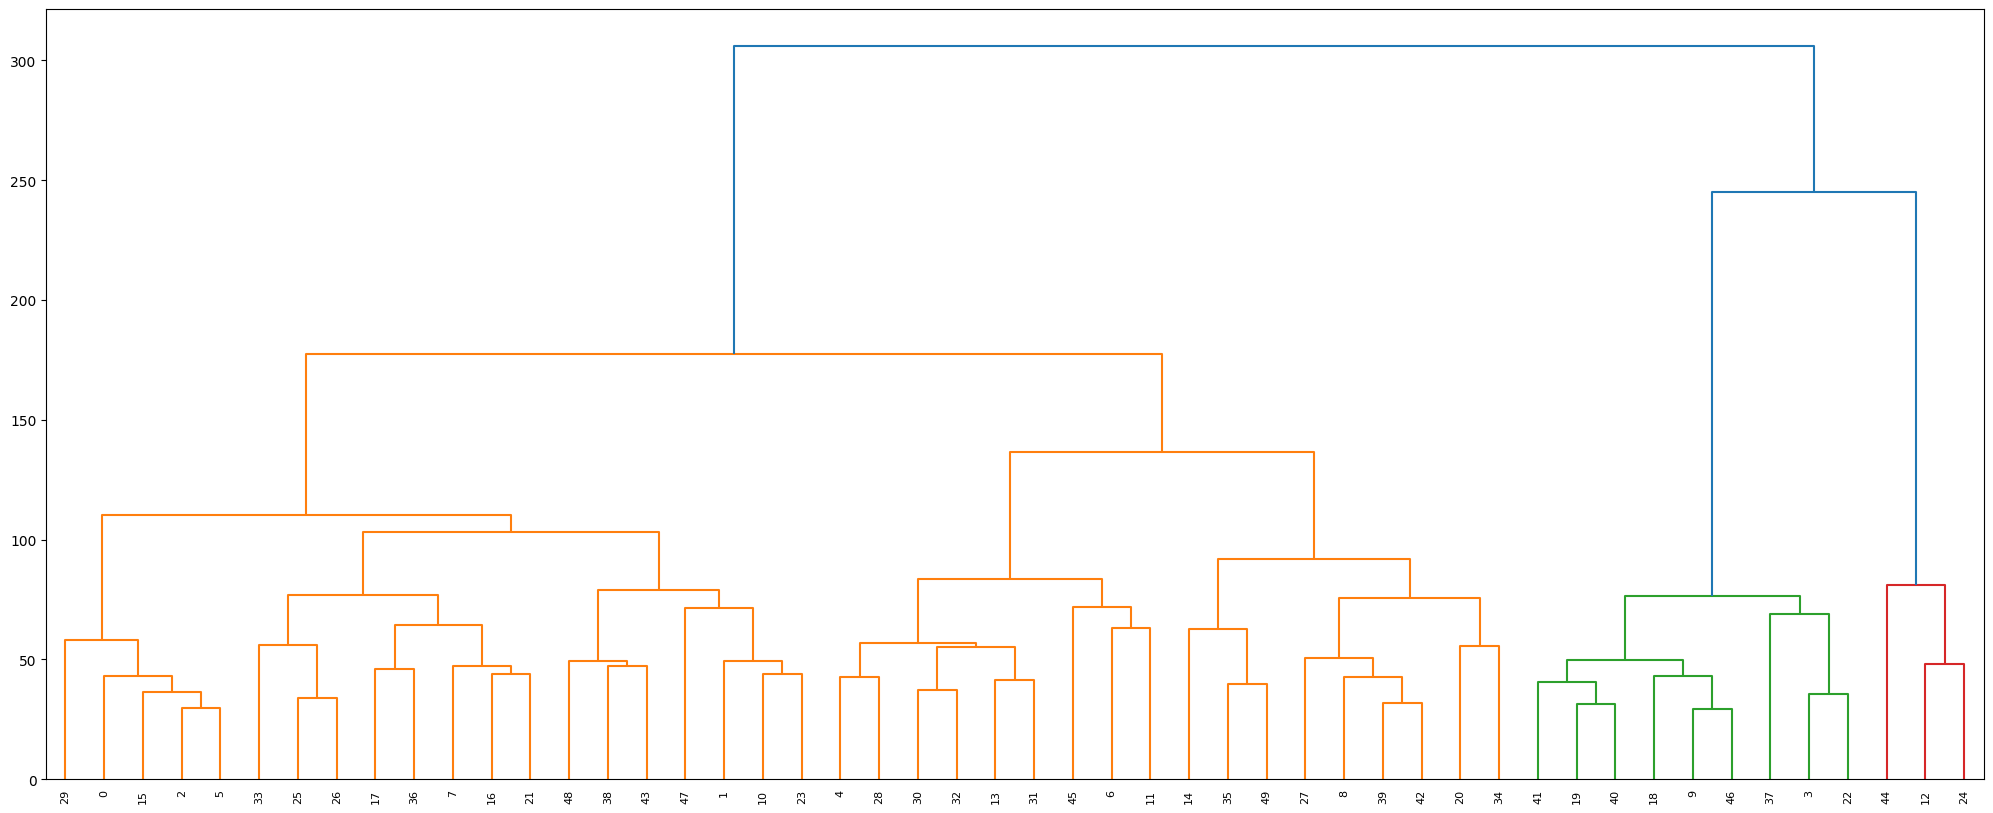

In [33]:
import scipy

Z = linkage(df, 'complete')

labels = scipy.cluster.hierarchy.fcluster(Z, t=150, criterion='distance')

#print(labels)

maximum=max(labels)


for j in range(1,maximum+1):
    print("#####################################")
    print("Cluster number "+str(j))
    for i in range(df.shape[0]):
        if(labels[i]==j):
            print(df_id['Name'][i]+" ", end="")
            print(Positions_array[df['Position'][i]])
    
    
fig = plt.figure(figsize=(25, 10))

dn = dendrogram(Z)

plt.show()

#####################################
Cluster number 1
De Gea GK
J. Oblak GK
M. ter Stegen GK
T. Courtois GK
M. Neuer GK
H. Lloris GK
S. Handanovič GK
G. Buffon GK
K. Navas GK
#####################################
Cluster number 2
K. De Bruyne RCM
L. Modrić RCM
T. Kroos LCM
David Silva LCM
J. Rodríguez LAM
Isco LW
C. Eriksen CAM
Coutinho LW
P. Pogba RDM
#####################################
Cluster number 3
L. Messi RF
Cristiano Ronaldo ST
Neymar Jr LW
E. Hazard LF
L. Suárez RS
R. Lewandowski ST
P. Dybala LF
H. Kane ST
A. Griezmann CAM
E. Cavani LS
S. Agüero ST
K. Mbappé RM
M. Salah RM
L. Insigne LW
P. Aubameyang LM
G. Bale ST
G. Higuaín LS
M. Icardi ST
R. Lukaku ST
C. Immobile ST
#####################################
Cluster number 4
Sergio Ramos RCB
N. Kanté LDM
Sergio Busquets CDM
Casemiro CDM
M. Hummels LCB
Marcelo LB
Thiago Silva RCB
S. Umtiti CB
Jordi Alba LB
#####################################
Cluster number 5
D. Godín CB
G. Chiellini LCB
K. Koulibaly LCB


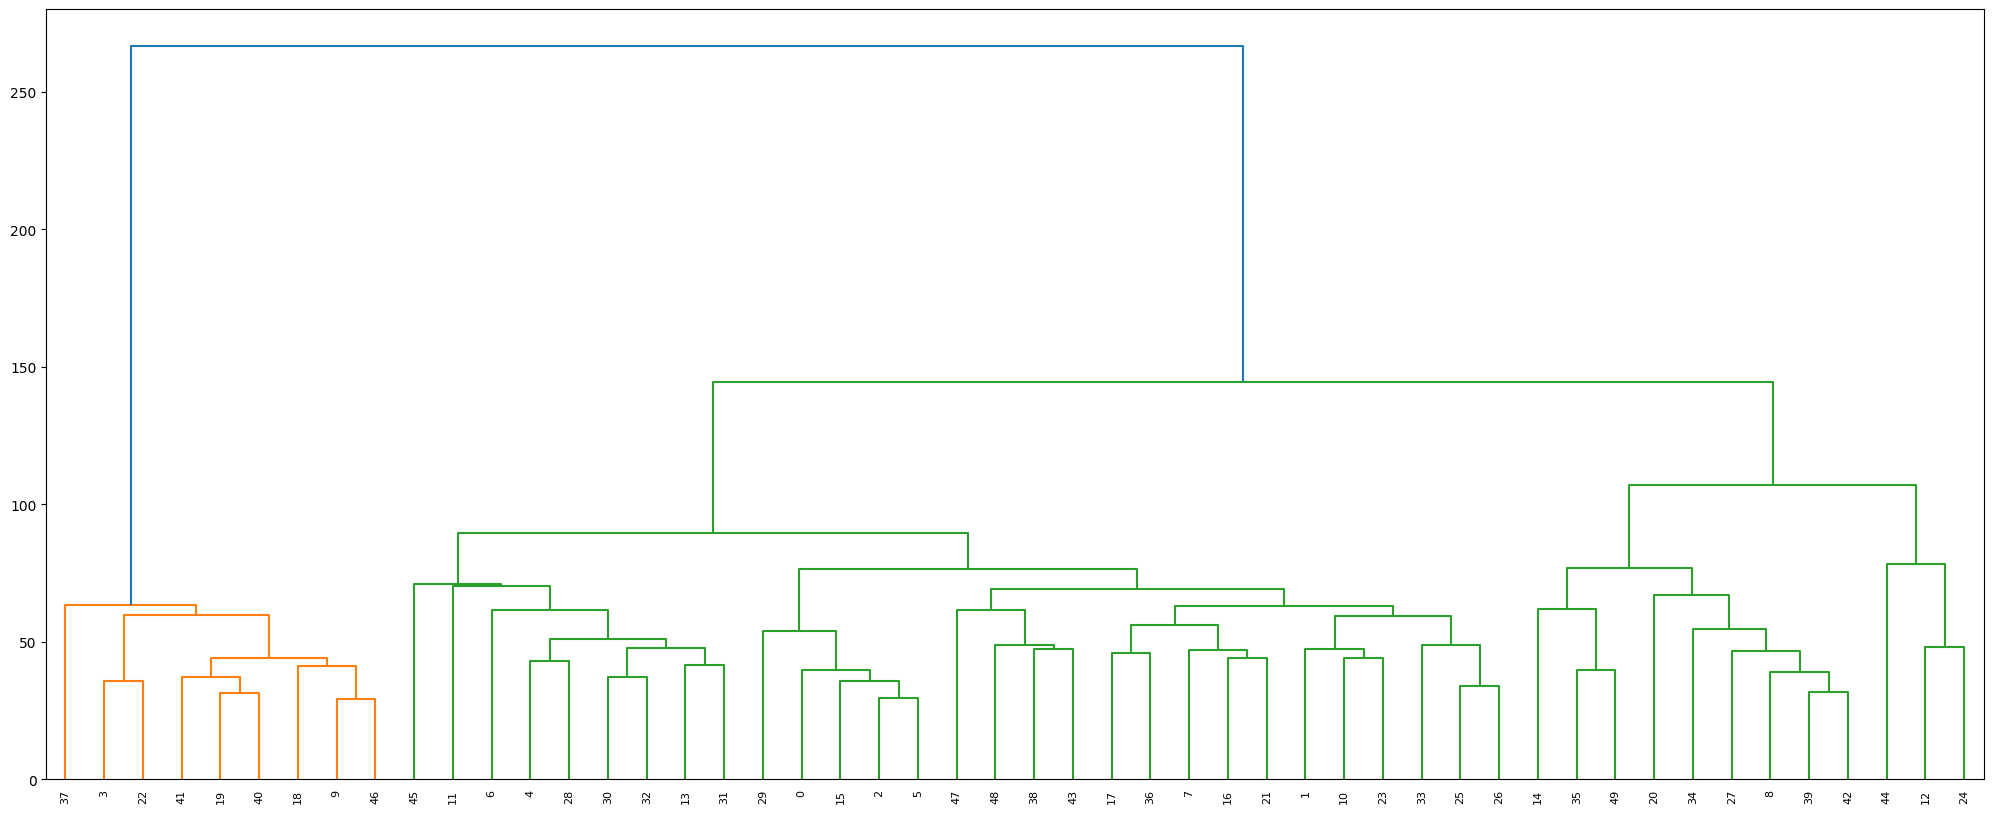

In [34]:
import scipy

Z = linkage(df, 'average')

labels = scipy.cluster.hierarchy.fcluster(Z, t=80, criterion='distance')

#print(labels)

maximum=max(labels)


for j in range(1,maximum+1):
    print("#####################################")
    print("Cluster number "+str(j))
    for i in range(df.shape[0]):
        if(labels[i]==j):
            print(df_id['Name'][i]+" ", end="")
            print(Positions_array[df['Position'][i]])
    
    
fig = plt.figure(figsize=(25, 10))

dn = dendrogram(Z)

plt.show()

#####################################
Cluster number 1
De Gea GK
J. Oblak GK
M. ter Stegen GK
T. Courtois GK
M. Neuer GK
H. Lloris GK
S. Handanovič GK
G. Buffon GK
K. Navas GK
#####################################
Cluster number 2
L. Messi RF
Cristiano Ronaldo ST
Neymar Jr LW
K. De Bruyne RCM
E. Hazard LF
L. Modrić RCM
L. Suárez RS
R. Lewandowski ST
T. Kroos LCM
David Silva LCM
P. Dybala LF
H. Kane ST
A. Griezmann CAM
E. Cavani LS
S. Agüero ST
K. Mbappé RM
M. Salah RM
J. Rodríguez LAM
L. Insigne LW
Isco LW
C. Eriksen CAM
Coutinho LW
P. Aubameyang LM
G. Bale ST
G. Higuaín LS
M. Icardi ST
P. Pogba RDM
R. Lukaku ST
C. Immobile ST
#####################################
Cluster number 3
Sergio Ramos RCB
N. Kanté LDM
Sergio Busquets CDM
Casemiro CDM
M. Hummels LCB
Marcelo LB
Thiago Silva RCB
S. Umtiti CB
Jordi Alba LB
#####################################
Cluster number 4
D. Godín CB
G. Chiellini LCB
K. Koulibaly LCB


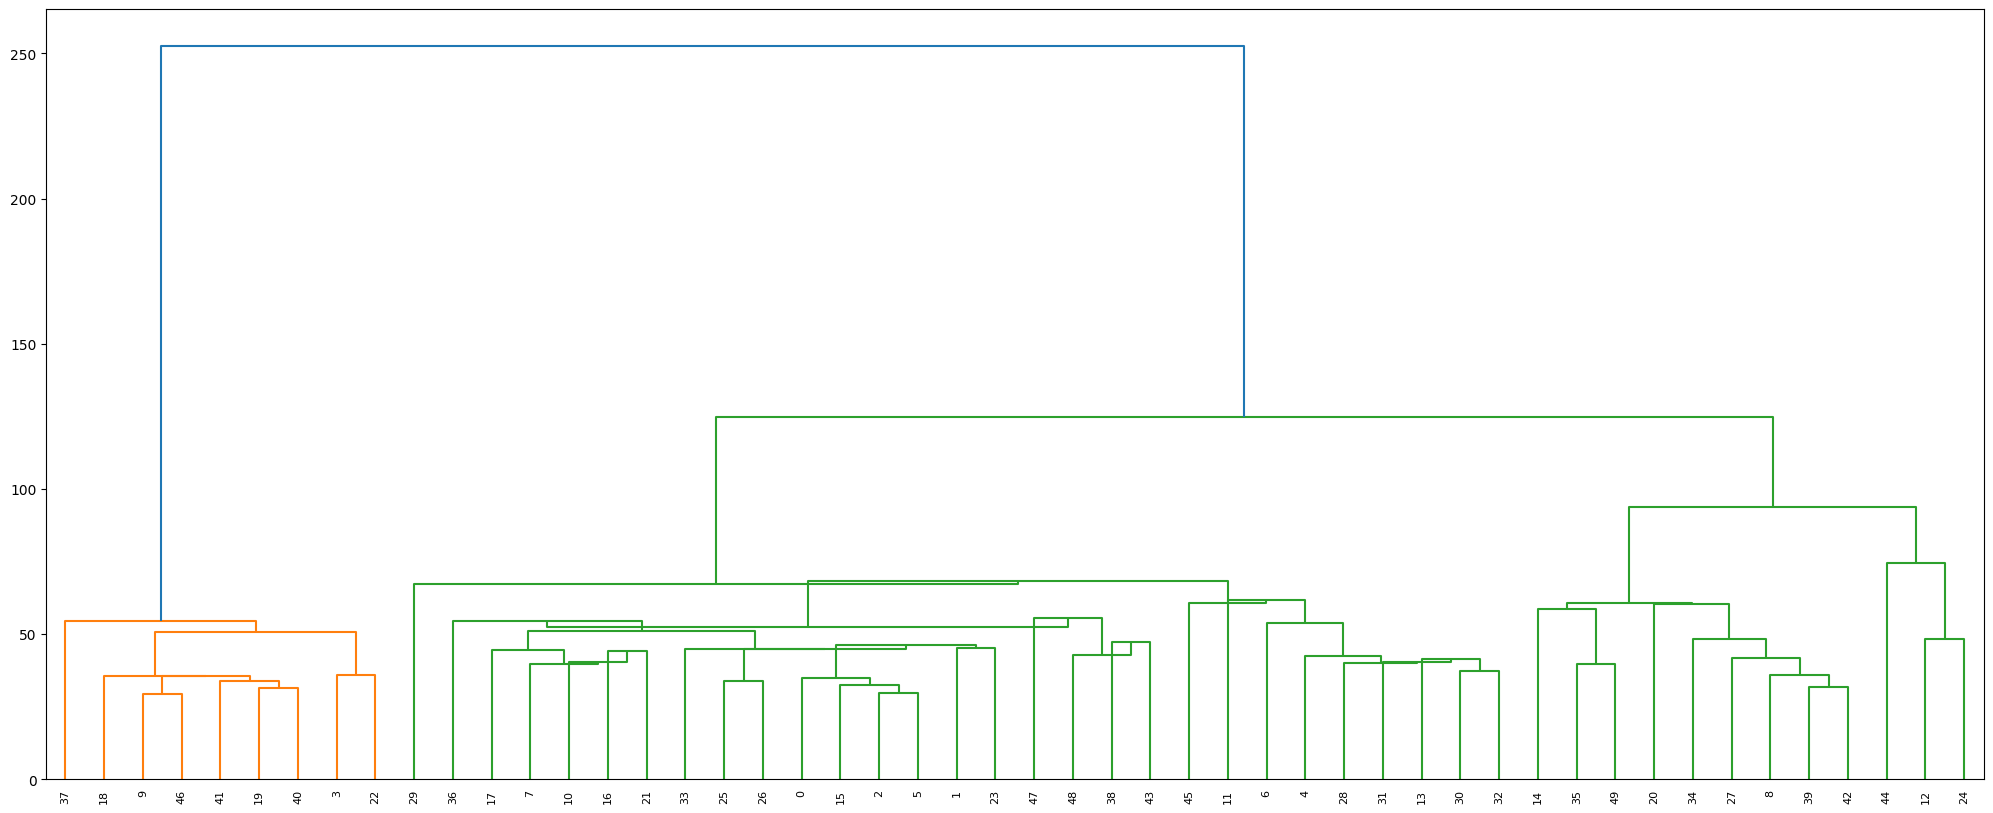

In [35]:
import scipy

Z = linkage(df, 'centroid')

labels = scipy.cluster.hierarchy.fcluster(Z, t=75, criterion='distance')

#print(labels)

maximum=max(labels)


for j in range(1,maximum+1):
    print("#####################################")
    print("Cluster number "+str(j))
    for i in range(df.shape[0]):
        if(labels[i]==j):
            print(df_id['Name'][i]+" ", end="")
            print(Positions_array[df['Position'][i]])
    
    
fig = plt.figure(figsize=(25, 10))

dn = dendrogram(Z)

plt.show()

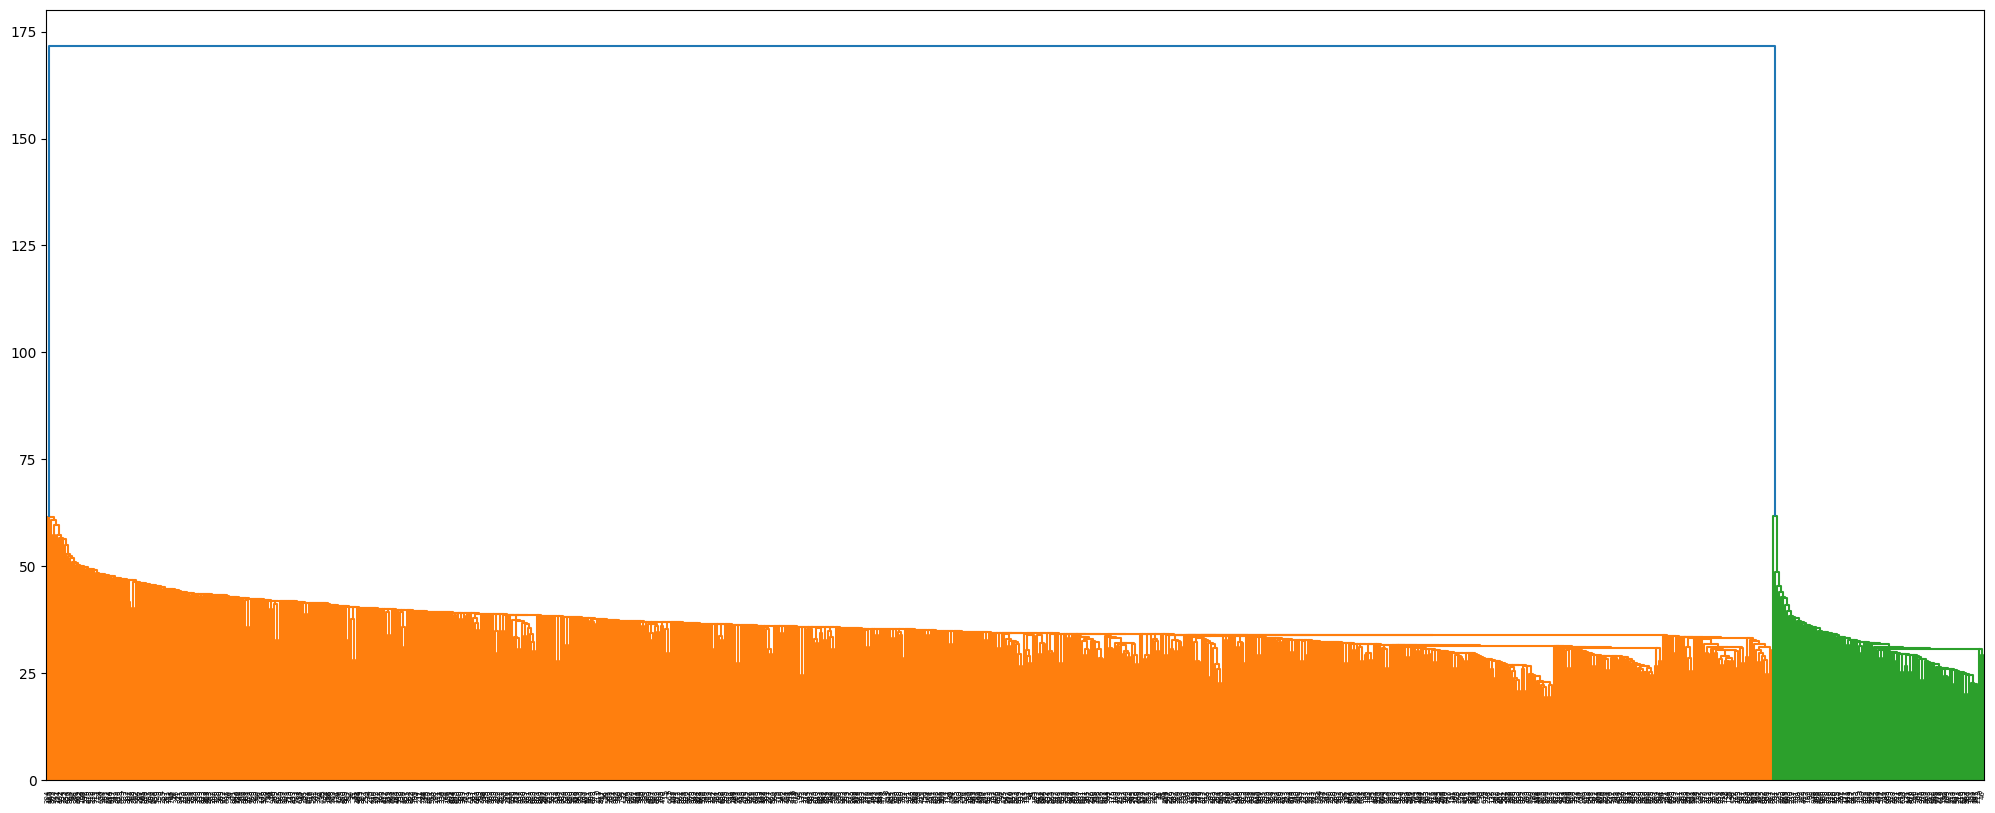

In [36]:
import scipy

Z = linkage(df_5000, 'single')

#labels = scipy.cluster.hierarchy.fcluster(Z, t=60, criterion='distance')

#print(labels)

#maximum=max(labels)


# for j in range(1,maximum+1):
#     print("#####################################")
#     print("Cluster number "+str(j))
#     for i in range(df.shape[0]):
#         if(labels[i]==j):
#             print(df_id['Name'][i]+" ", end="")
#             print(Positions_array[df['Position'][i]])

    
    
fig = plt.figure(figsize=(25, 10))

dn = dendrogram(Z)

plt.show()

In-depth analysis of all the cluster patterns provided is in the attached separate analysis document.